In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

df = pd.read_csv('/content/drive/MyDrive/Praktikum Machine Learning_Amaya Eshia_0110224102_Ai02/Praktikum 6/Data/heart.csv')  # Asumsi path serupa dengan Iris.csv
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
df.duplicated().sum()

np.int64(723)

In [ ]:
df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

In [ ]:
df["target"].value_counts()

,count
target,
1,164
0,138


In [ ]:
df["target"].value_counts(normalize=True) * 100

,proportion
target,
1,54.304636
0,45.695364


In [ ]:
# Cek unique values pada kolom target (seperti df["Species"].unique())
print("Unique values di kolom 'target':")
df["target"].unique()

Unique values di kolom 'target':


array([0, 1])

In [ ]:
# Cek distribusi kelas (seperti df["Species"].value_counts())
print("Distribusi kelas pada kolom 'target':")
df["target"].value_counts()

Distribusi kelas pada kolom 'target':


,count
target,
1,526
0,499


In [ ]:
# Feature Selection
X = df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]  # Pilih 5 fitur contoh
# Atau gunakan semua fitur kecuali target:
# X = df.drop('target', axis=1)

y = df['target']  # Kolom target

X = df.drop('target', axis=1)  # Fitur
y = df['target']  # Target (0 atau 1 untuk penyakit jantung)

# Split data menjadi train dan test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [ ]:
# Inisialisasi model SVM dengan kernel linear (bisa diganti ke 'rbf', 'poly', dll.)
model = SVC(kernel='linear', random_state=42)

# Train model
model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [ ]:
# Prediksi pada data test
y_pred = model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print(f'Akuracy: {accuracy * 100:.2f}%')

print('Classification Report:')
print(classification_report(y_test, y_pred))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Akuracy: 80.49%
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.71      0.78       102
           1       0.76      0.90      0.82       103

    accuracy                           0.80       205
   macro avg       0.82      0.80      0.80       205
weighted avg       0.82      0.80      0.80       205

Confusion Matrix:
[[72 30]
 [10 93]]


In [ ]:
# Gunakan scaling (penting untuk SVM!)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = SVC(kernel='rbf', C=1.0, random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

Confusion Matrix:
[[62 40]
 [25 78]]


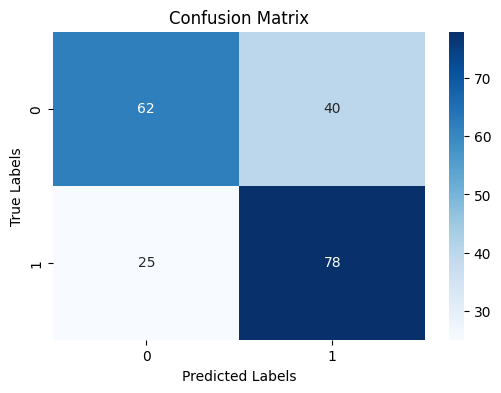

In [ ]:
# Hitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Tampilkan dalam bentuk teks
print("Confusion Matrix:")
print(cm)

# Visualisasi dengan seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

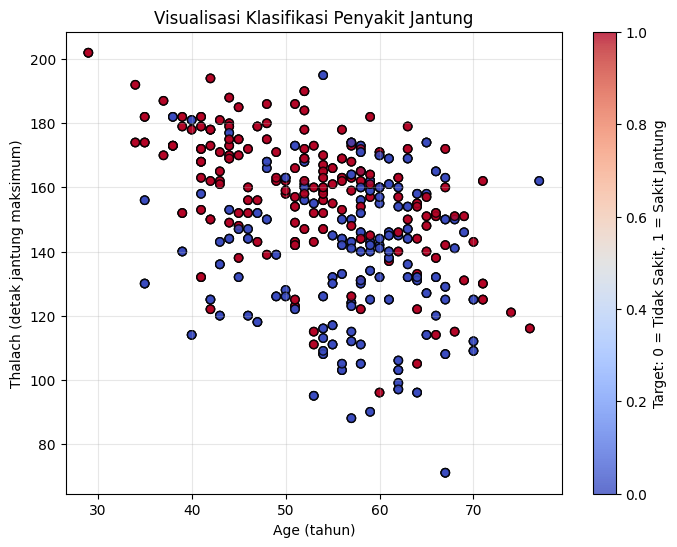

In [ ]:
plt.figure(figsize=(8, 6))

# Scatter plot: x = age, y = thalach, warna berdasarkan target
plt.scatter(df['age'], df['thalach'],
            c=df['target'],           # Warna berdasarkan target (0 atau 1)
            cmap='coolwarm',          # Biru = 0, Merah = 1
            alpha=0.8,
            edgecolors='k')

# Label dan judul
plt.xlabel('Age (tahun)')
plt.ylabel('Thalach (detak jantung maksimum)')
plt.title('Visualisasi Klasifikasi Penyakit Jantung')

# Tambahkan colorbar
cbar = plt.colorbar()
cbar.set_label('Target: 0 = Tidak Sakit, 1 = Sakit Jantung')

plt.grid(True, alpha=0.3)
plt.show()

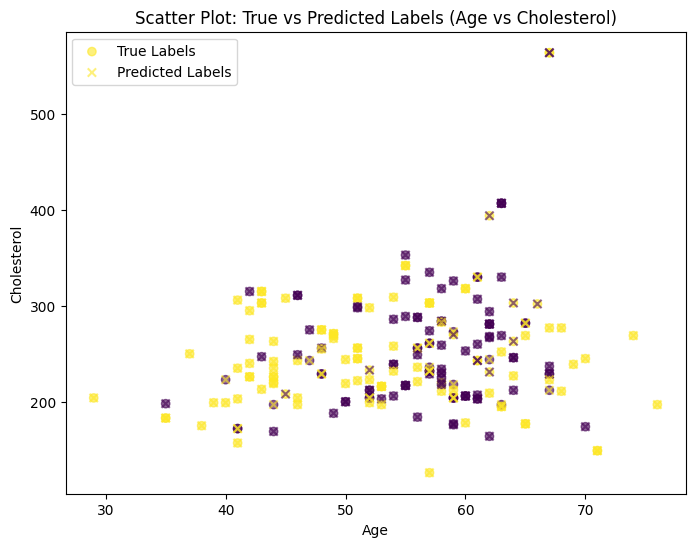

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Load the data from heart.csv
df = pd.read_csv('/content/drive/MyDrive/Praktikum Machine Learning_Amaya Eshia_0110224102_Ai02/Praktikum 6/Data/heart.csv')  # Asumsi path serupa dengan Iris.csv
df

# Features and target
X = df.drop('target', axis=1)
y = df['target']

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a simple logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Plot similar to the example, using 'age' and 'chol' as features
plt.figure(figsize=(8, 6))
plt.scatter(X_test['age'], X_test['chol'], c=y_test, cmap='viridis', marker='o', label='True Labels', alpha=0.6)
plt.scatter(X_test['age'], X_test['chol'], c=y_pred, cmap='viridis', marker='x', label='Predicted Labels', alpha=0.6)
plt.title('Scatter Plot: True vs Predicted Labels (Age vs Cholesterol)')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.legend()
plt.show()

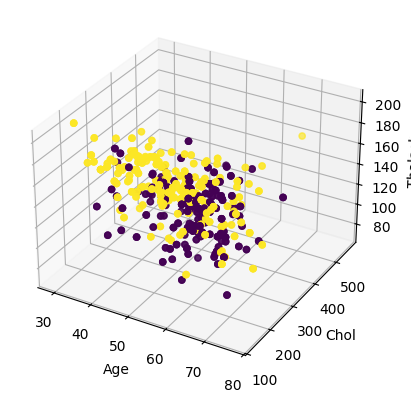

In [ ]:
# Visualisasi 3D sederhana: Pilih 3 fitur utama untuk plot (misalnya age, chol, thalach)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot data berdasarkan target
ax.scatter(df['age'], df['chol'], df['thalach'], c=df['target'], cmap='viridis')

ax.set_xlabel('Age')
ax.set_ylabel('Chol')
ax.set_zlabel('Thalach')
plt.show()